# Precios de Casas:

A  partir  de  la  base  de  datos  de  precios  de  casas  de  Boston ( Boston  Housing  Data
),  realiza  la regresión de los precios de las casas con las siguientes variantes:

* Usando m ́ınimos cuadrados
* Aplicando regularización por norma $l_{1}$ y $l_2$
* Expandiendo los atributos con funciones base polinomiales
* Seleccionando los atributos más importantes

Grafica el error de generalización del modelo con diferentes grados del polinomio, coeficientes de
regularización  y  n ́umero  de  atributos.  Todos  los  modelos  deber ́an  ser  evaluados  con  validación
cruzada de 10 particiones

In [42]:
# Se obtiene los datos de la liga que esta se encuentra de a continuación:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

--2017-03-20 22:42:34--  http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49082 (48K) [text/plain]
Saving to: ‘housing.data.2’

housing.data.2      100%[===================>]  47.93K  --.-KB/s    in 0.1s    

2017-03-20 22:42:35 (375 KB/s) - ‘housing.data.2’ saved [49082/49082]



In [43]:
#Funcion MyLinearRegression la cual se baso en el código proporcionado por  @Dr. Gibran Fuentes-Pineda
def MyLinearRegression(X_train,y_train):
    # Para encontrar pesos por mínimos cuadrados, theta_ml = (XT X)-1 XT y
    # (XT X)
    XTX = np.dot(X_train.T, X_train)
    # (XT X)-1
    XTX_inv = np.linalg.inv(XTX)
    # XT y
    XTy = np.dot(X_train.T, y_train)
    #theta_ml = (XT X)-1 XT y
    theta_ml = np.dot(XTX_inv, XTy)
    return theta_ml

In [44]:
import numpy as np

#Se cargan los datos.
data = np.loadtxt("housing.data")

# divide aleatoriamente la base de datos en entrenamiento (80%) y validación (20%)
indices = numpy.random.permutation(data.shape[0])
training_idx, test_idx = indices[:int(data.shape[0]*0.8)], indices[int(data.shape[0]*0.8):]
X_train, X_test = data[training_idx,:], data[test_idx,:]

#mostrando las dimensiones que tienen el conjunto de entrenamiento y el de test
print (X_train.shape)
print (X_test.shape)

(404, 14)
(102, 14)


In [45]:
# crea matriz de diseño (agrega 1 a las entradas para la ordenada al origen)
X_train_ones_p = np.insert(X_train,0,1.0,axis=1)
X_test_ones_p = np.insert(X_test,0,1.0,axis=1)

# Se obtiene las variables que entraran al modelo
X_train_ones=X_train_ones_p[:,0:14]
X_test_ones=X_test_ones_p[:,0:14]

# Se obtienen las variables que se van a predecir.
y_train=X_train_ones_p[:,14:15]
y_test=X_test_ones_p[:,14:15]

In [46]:
#Madar a llamar a la función que implementamos.
print ("Coefficients: \n",MyLinearRegression(X_train_ones,y_train))

('Coefficients: \n', array([[  4.18660898e+01],
       [ -1.28297137e-01],
       [  5.32673261e-02],
       [  9.23086806e-03],
       [  1.78557401e+00],
       [ -1.92241096e+01],
       [  3.38605167e+00],
       [  4.56588235e-03],
       [ -1.60923113e+00],
       [  3.19291153e-01],
       [ -1.25339778e-02],
       [ -9.88667847e-01],
       [  7.16334517e-03],
       [ -5.20826847e-01]]))


# Usando sklearn:

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=False)

# Train the model using the training sets
regr.fit(X_train_ones, y_train)
y_train_hat = regr.predict(X_train_ones)
sse_train = np.square(y_train - y_train_hat).sum()
print sse_train
print('Coefficients: \n', regr.coef_)

9290.49085201
('Coefficients: \n', array([[  4.18660898e+01,  -1.28297137e-01,   5.32673261e-02,
          9.23086806e-03,   1.78557401e+00,  -1.92241096e+01,
          3.38605167e+00,   4.56588235e-03,  -1.60923113e+00,
          3.19291153e-01,  -1.25339778e-02,  -9.88667847e-01,
          7.16334517e-03,  -5.20826847e-01]]))


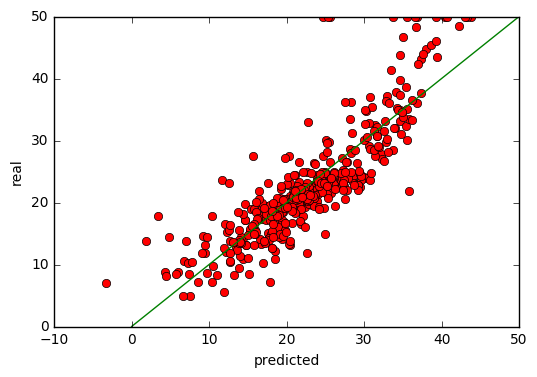

In [51]:
%matplotlib inline
import matplotlib.pyplot as pl
import numpy as np
# Plot outputs
%matplotlib inline
pl.plot(y_train_hat, y_train,'ro')
pl.plot([0,50],[0,50], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

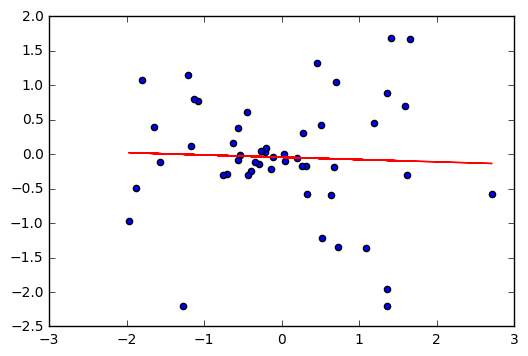

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)


fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)

fig.show()

# Aplicando norma $l_{1}$

In [55]:
#
import numpy as np
import scipy.sparse as sp
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


regr.fit(X_train_ones, y_train)

clf = Lasso(alpha=0.1, copy_X=True, fit_intercept=True, normalize=True)
lasso  = clf.fit(X_train_ones, y_train)
y_train_hat = lasso.predict(X_train_ones)
sse_train = np.square(y_train - y_train_hat).sum()

print sse_train

18282672.1122


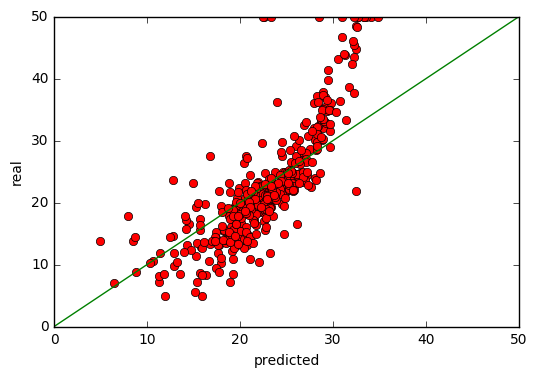

In [56]:
%matplotlib inline
import matplotlib.pyplot as pl
import numpy as np
# Plot outputs
%matplotlib inline
pl.plot(y_train_hat, y_train,'ro')
pl.plot([0,50],[0,50], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

In [41]:
def polynomial_expansion(X, degree):
    phi_X = X
    for i in range(degree - 1):
        powerX = np.power(X, i + 2)
        phi_X = np.column_stack((phi_X, powerX))
    return phi_X

polynomial_expansion(X_train_ones,14)

array([[  1.00000000e+00,   2.51990000e-01,   0.00000000e+00, ...,
          5.93172788e+17,   1.84506498e+36,   3.92688736e+17],
       [  1.00000000e+00,   8.02710000e-01,   0.00000000e+00, ...,
          3.24391993e+18,   2.83373615e+34,   8.90026948e+14],
       [  1.00000000e+00,   1.18123000e+01,   0.00000000e+00, ...,
          1.88329855e+18,   3.92747057e+23,   9.88704350e+18],
       ..., 
       [  1.00000000e+00,   4.64689000e+00,   0.00000000e+00, ...,
          1.88329855e+18,   1.07460081e+36,   8.58577901e+14],
       [  1.00000000e+00,   7.84200000e-01,   0.00000000e+00, ...,
          3.24391993e+18,   1.67503742e+36,   2.13806839e+16],
       [  1.00000000e+00,   3.18270000e-01,   0.00000000e+00, ...,
          5.09858334e+17,   1.93111331e+36,   4.83364231e+17]])